In [1]:
#NOte
#1.Will apply simple linear regression here 
#2. Open will be out independnt and close will be out dependednt value

## 01. importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn  import metrics

## 02.reading file

In [3]:
df = pd.read_csv('Nifty50.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)
df = df[['Open','High','Low','Close']]
df


,Open,High,Low,Close
Date,,,,
2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902
2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195
2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098
2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805
2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805
...,...,...,...,...
2023-04-26,17767.300781,17827.750000,17711.199219,17813.599609
2023-04-27,17813.099609,17931.599609,17797.900391,17915.050781
2023-04-28,17950.400391,18089.150391,17885.300781,18065.000000


In [4]:
df.isnull().sum()

Open     0
High     0
Low      0
Close    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3828 entries, 2007-09-17 to 2023-05-03
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3828 non-null   float64
 1   High    3828 non-null   float64
 2   Low     3828 non-null   float64
 3   Close   3828 non-null   float64
dtypes: float64(4)
memory usage: 149.5 KB


##  03_ checking linear regression or not

Text(0.5, 1.0, 'Smooth_Open vs Smooth Close')

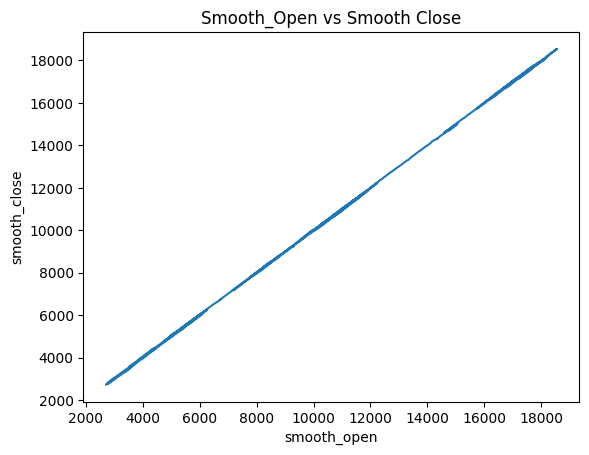

In [6]:

window_size = 20

smooth_open= df['Open'].rolling(window_size).mean()
smoth_close = df['Close'].rolling(window_size).mean()

plt.plot(smooth_open, smoth_close)
plt.xlabel('smooth_open')
plt.ylabel('smooth_close')
plt.title('Smooth_Open vs Smooth Close')


Text(0.5, 1.0, 'Smoothed High vs Smoothed Close')

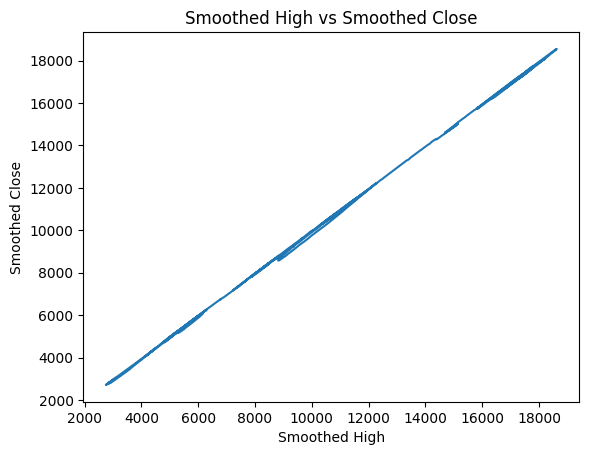

In [7]:
window_size = 20  # Adjust the window size as per your preference

smoothed_high = df['High'].rolling(window=window_size).mean()
smoothed_close = df['Close'].rolling(window=window_size).mean()

plt.plot(smoothed_high, smoothed_close)
plt.xlabel('Smoothed High')
plt.ylabel('Smoothed Close')
plt.title('Smoothed High vs Smoothed Close')

Text(0.5, 1.0, 'Smoothed Low vs Smoothed Close')

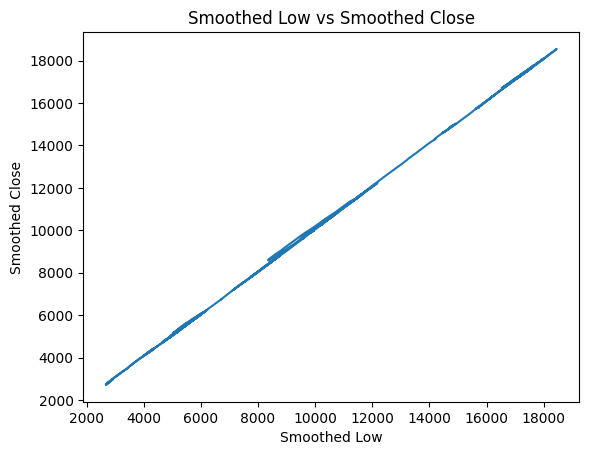

In [8]:
window_size = 20  # Adjust the window size as per your preference

smoothed_low = df['Low'].rolling(window=window_size).mean()
smoothed_close = df['Close'].rolling(window=window_size).mean()

plt.plot(smoothed_low, smoothed_close)
plt.xlabel('Smoothed Low')
plt.ylabel('Smoothed Close')
plt.title('Smoothed Low vs Smoothed Close')

##  04.Setting input and target variable 

In [9]:
X =df['Open']
X

Date
2007-09-17     4518.450195
2007-09-18     4494.100098
2007-09-19     4550.250000
2007-09-20     4734.850098
2007-09-21     4752.950195
                  ...     
2023-04-26    17767.300781
2023-04-27    17813.099609
2023-04-28    17950.400391
2023-05-02    18124.800781
2023-05-03    18113.800781
Name: Open, Length: 3828, dtype: float64

In [10]:
y = df['Close']
y

Date
2007-09-17     4494.649902
2007-09-18     4546.200195
2007-09-19     4732.350098
2007-09-20     4747.549805
2007-09-21     4837.549805
                  ...     
2023-04-26    17813.599609
2023-04-27    17915.050781
2023-04-28    18065.000000
2023-05-02    18147.650391
2023-05-03    18089.849609
Name: Close, Length: 3828, dtype: float64

##  05.Train test split

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2  ,random_state=0)

In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3062,)
(766,)
(3062,)
(766,)


In [13]:
766/(766+3062)

0.2001044932079415

## 06.fitting the mdoel

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
model = LinearRegression()

In [16]:
X_train = X_train.values.reshape(-1,1)

In [17]:
y_train = y_train.values.reshape(-1,1)

In [18]:
model.fit(X_train,y_train)

LinearRegression()

In [19]:
m = model.coef_
m

array([[0.99924244]])

In [20]:
y = model.intercept_
y

array([-0.45387387])

##  07_ testing the model

In [21]:
X_test

Date
2010-03-04     5096.950195
2021-10-18    18500.099609
2008-01-23     4903.049805
2010-05-04     5223.899902
2020-04-28     9389.799805
                  ...     
2017-06-13     9615.549805
2017-06-06     9704.250000
2021-09-22    17580.900391
2020-01-29    12114.900391
2015-11-10     7877.600098
Name: Open, Length: 766, dtype: float64

In [22]:
y_test

Date
2010-03-04     5080.250000
2021-10-18    18477.050781
2008-01-23     5203.399902
2010-05-04     5148.500000
2020-04-28     9380.900391
                  ...     
2017-06-13     9606.900391
2017-06-06     9637.150391
2021-09-22    17546.650391
2020-01-29    12129.500000
2015-11-10     7783.350098
Name: Close, Length: 766, dtype: float64

In [26]:
X_test.iloc[1].reshape( -1,1)

array([[18500.09960938]])

In [38]:
model.predict(X_test.iloc[3].reshape( -1,1))

array([[5219.48862438]])

Text(0, 0.5, 'Close')

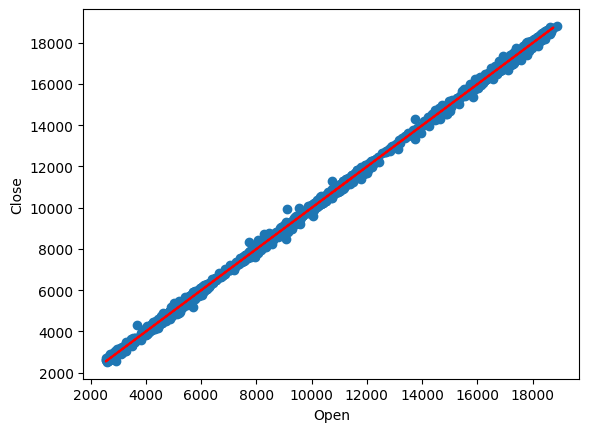

In [25]:
window_size = 20  # Adjust the window size as per your preference

smoothed_low = df['Low'].rolling(window=window_size).mean()
smoothed_close = df['Close'].rolling(window=window_size).mean()


plt.scatter(df['Open'],df['Close'])
plt.plot(X_train,model.predict(X_train),color='red')
plt.xlabel('Open')
plt.ylabel('Close')